In [31]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [32]:
MNIST = tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test) = MNIST.load_data()

In [33]:
x_train, x_test = x_train/255.0, x_test/255.0
x_train.shape

(60000, 28, 28)

In [34]:
test = np.concatenate((y_train,y_test),axis=0)
test = pd.DataFrame(test)
test.nunique()

,0
0,10


In [35]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [36]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [40]:
r = model.fit(x_train,y_train,epochs=10, validation_data=(x_test,y_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9878 - loss: 0.0371 - val_accuracy: 0.9791 - val_loss: 0.0722
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9868 - loss: 0.0381 - val_accuracy: 0.9806 - val_loss: 0.0742
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 5ms/step - accuracy: 0.9887 - loss: 0.0364 - val_accuracy: 0.9798 - val_loss: 0.0753
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9887 - loss: 0.0339 - val_accuracy: 0.9798 - val_loss: 0.0825
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9889 - loss: 0.0327 - val_accuracy: 0.9802 - val_loss: 0.0804
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9895 - loss: 0.0295 - val_accuracy: 0.9783 - val_loss: 0.0836
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9902 - loss: 0.0292 - val_accuracy: 0.9806 - val_loss: 0.0809
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.9916 - loss: 0.02

In [38]:
model.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9758 - loss: 0.0837


[0.06823365390300751, 0.9799000024795532]

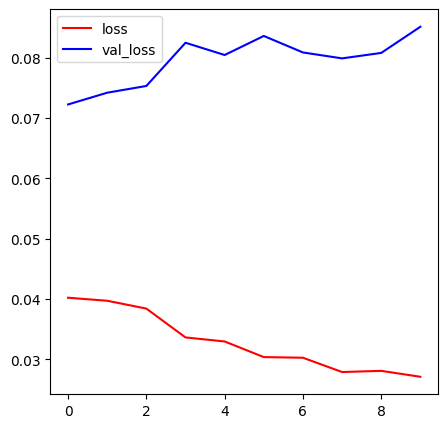

In [42]:
plt.figure(figsize=(5,5), dpi=100)
plt.plot(r.history['loss'], label='loss', color='red')
plt.plot(r.history['val_loss'], label='val_loss', color='blue')
plt.legend()
plt.show()

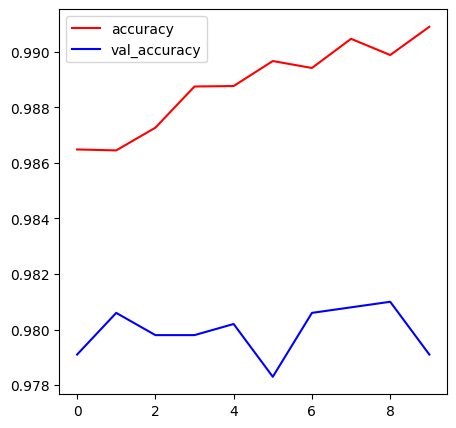

In [44]:
plt.figure(figsize=(5,5), dpi=100)
plt.plot(r.history['accuracy'], label='accuracy', color='red')
plt.plot(r.history['val_accuracy'], label='val_accuracy', color='blue')
plt.legend()
plt.show()